In [70]:
#第一题
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'earthquakes-2024-11-04_15-26-37_+0800.tsv'
Sig_Eqs = pd.read_csv(file_path, sep='\t')

# 问题 1.1: 计算每个国家因地震导致的总死亡人数，并打印死亡人数最多的前20个国家
death_data = Sig_Eqs[['Country', 'Total Deaths']].dropna()
death_data['Total Deaths'] = pd.to_numeric(death_data['Total Deaths'], errors='coerce')
total_deaths_by_country = death_data.groupby('Country')['Total Deaths'].sum().sort_values(ascending=False)
print("死亡人数最多的前20个国家及其死亡人数：")
print(total_deaths_by_country.head(20))

死亡人数最多的前20个国家及其死亡人数：
Country
CHINA           2042831.0
TURKEY           995648.0
IRAN             758654.0
SYRIA            437700.0
ITALY            422679.0
JAPAN            356605.0
HAITI            323776.0
AZERBAIJAN       310119.0
INDONESIA        282827.0
ARMENIA          189000.0
PAKISTAN         143712.0
ECUADOR          134445.0
TURKMENISTAN     110412.0
PERU              96876.0
PORTUGAL          82572.0
GREECE            82277.0
IRAQ              70200.0
CHILE             70175.0
INDIA             62412.0
TAIWAN            57723.0
Name: Total Deaths, dtype: float64


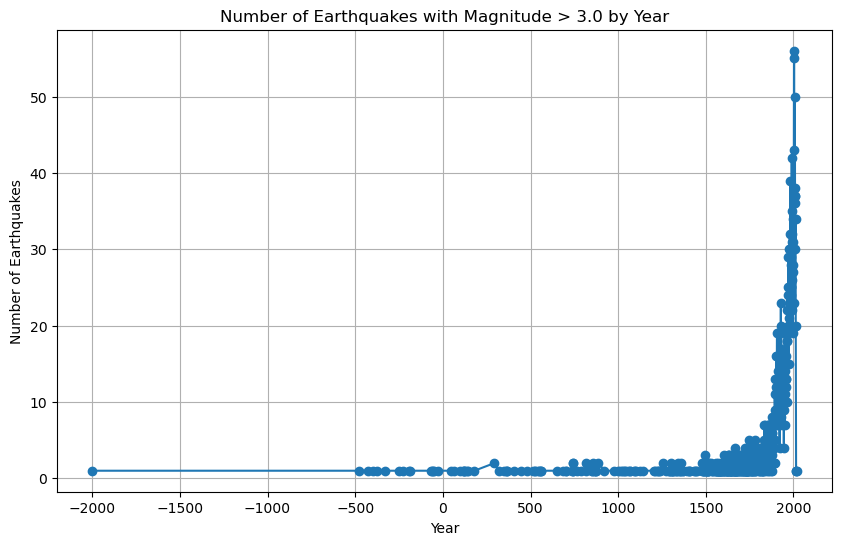

In [15]:
# 问题 1.2: 计算每年全球震级大于 3.0 的地震总数，并绘制时间序列
filtered_data = Sig_Eqs[Sig_Eqs['Ms'] > 3.0].dropna(subset=['Year'])
filtered_data['Year'] = pd.to_numeric(filtered_data['Year'], errors='coerce')
earthquake_counts_by_year = filtered_data.groupby('Year').size()

plt.figure(figsize=(10, 6))
plt.plot(earthquake_counts_by_year.index, earthquake_counts_by_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes with Magnitude > 3.0 by Year')
plt.grid(True)
plt.show()

In [24]:
# 问题 1.3: 编写函数 CountEq_LargestEq
def CountEq_LargestEq(country, data):
    country_data = data[data['Country'] == country]
    country_data = country_data.dropna(subset=['Ms'])  # 确保没有 NaN 值影响 idxmax()
    total_eqs = len(country_data)
    if total_eqs == 0:
        return total_eqs, None, None
    largest_eq_idx = country_data['Ms'].idxmax()
    if pd.isna(largest_eq_idx):
        return total_eqs, None, None
    largest_eq = country_data.loc[largest_eq_idx]
    return total_eqs, largest_eq['Year'], largest_eq['Location Name']

results = []
for country in Sig_Eqs['Country'].dropna().unique():
    total_eqs, year, location = CountEq_LargestEq(country, Sig_Eqs)
    results.append((country, total_eqs, year, location))

results_sorted = sorted(results, key=lambda x: x[1], reverse=True)
print("\n每个国家的地震总数及最大地震的信息：")
for result in results_sorted:
    print(f"国家: {result[0]}, 地震总数: {result[1]}, 最大地震年份: {result[2]}, 最大地震地点: {result[3]}")


每个国家的地震总数及最大地震的信息：
国家: CHINA, 地震总数: 501, 最大地震年份: 1920.0, 最大地震地点: CHINA:  GANSU PROVINCE, SHANXI PROVINCE
国家: JAPAN, 地震总数: 271, 最大地震年份: 869.0, 最大地震地点: JAPAN:  SANRIKU
国家: INDONESIA, 地震总数: 245, 最大地震年份: 2004.0, 最大地震地点: INDONESIA:  SUMATRA:  ACEH:  OFF WEST COAST
国家: IRAN, 地震总数: 158, 最大地震年份: 856.0, 最大地震地点: IRAN:  DAMGHAN, QUMIS
国家: USA, 地震总数: 143, 最大地震年份: 1957.0, 最大地震地点: ALASKA
国家: TURKEY, 地震总数: 128, 最大地震年份: 1939.0, 最大地震地点: TURKEY:  ERZINCAN
国家: GREECE, 地震总数: 110, 最大地震年份: 365.0, 最大地震地点: GREECE:  CRETE:  KNOSSOS
国家: CHILE, 地震总数: 110, 最大地震年份: 1730.0, 最大地震地点: CHILE:  VALPARAISO
国家: PHILIPPINES, 地震总数: 98, 最大地震年份: 1897.0, 最大地震地点: PHILIPPINES:  MINDANAO, ZAMBOANGA, SULU, ISABELA
国家: RUSSIA, 地震总数: 90, 最大地震年份: 1952.0, 最大地震地点: RUSSIA:  KAMCHATKA PENINSULA
国家: TAIWAN, 地震总数: 85, 最大地震年份: 1920.0, 最大地震地点: TAIWAN
国家: MEXICO, 地震总数: 82, 最大地震年份: 1787.0, 最大地震地点: MEXICO:  SAN MARCOS, OAXACA
国家: PERU, 地震总数: 78, 最大地震年份: 1619.0, 最大地震地点: PERU:  TRUJILLO, PIURA, SANTA
国家: ITALY, 地震总数: 63, 最大地震年份: 1915.0, 最大地震地点: 

<>:15: SyntaxWarning: invalid escape sequence '\+'
<>:15: SyntaxWarning: invalid escape sequence '\+'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14708\2844787280.py:15: SyntaxWarning: invalid escape sequence '\+'
  weather_data['TMP_Value'] = pd.to_numeric(tmp_split[0].str.replace('\+', ''), errors='coerce') / 10  # 转换温度值
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14708\2844787280.py:7: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_data = pd.read_csv(file_path_temperature)


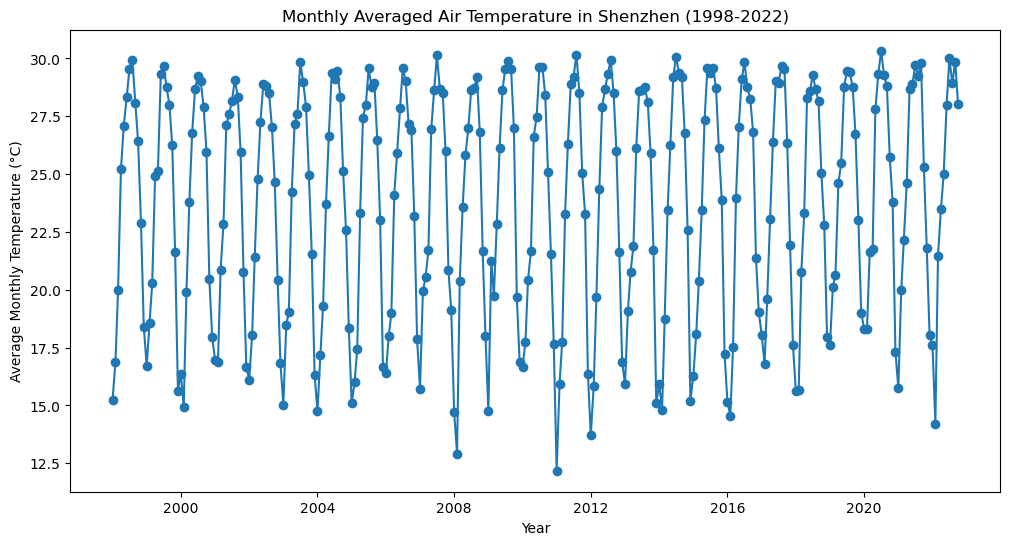

In [128]:
#第二题

import pandas as pd
import matplotlib.pyplot as plt


file_path_temperature = 'Baoan_Weather_1998_2022.csv'
weather_data = pd.read_csv(file_path_temperature)

# 过滤气温数据，使用 "TMP" 列表示气温
weather_data['Year'] = pd.to_datetime(weather_data['DATE']).dt.year
weather_data['Month'] = pd.to_datetime(weather_data['DATE']).dt.month

# 分离 TMP 列的温度值和质量代码
tmp_split = weather_data['TMP'].str.split(',', expand=True)
weather_data['TMP_Value'] = pd.to_numeric(tmp_split[0].str.replace('\+', ''), errors='coerce') / 10  # 转换温度值
weather_data['TMP_Quality'] = tmp_split[1].astype(int)  # 转换质量代码

# 只保留质量代码为 0 或 1 的数据（通过质量控制检查的数据）
filtered_weather_data = weather_data[weather_data['TMP_Quality'].isin([0, 1])]


monthly_avg_temp = filtered_weather_data.groupby(['Year', 'Month'])['TMP_Value'].mean().reset_index()
monthly_avg_temp['Date'] = pd.to_datetime(monthly_avg_temp[['Year', 'Month']].assign(DAY=1))

# 绘制气温变化图
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_temp['Date'], monthly_avg_temp['TMP_Value'], linestyle='-', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Monthly Temperature (°C)')
plt.title('Monthly Averaged Air Temperature in Shenzhen (1998-2022)')
plt.show()

In [88]:
#第三题
import pandas as pd


file_path = 'ibtracs.ALL.list.v04r00.csv'
df = pd.read_csv(file_path, usecols=range(17), skiprows=[1, 2], parse_dates=['ISO_TIME'], na_values=['NOT_NAMED', 'NAME'])

# 问题 3.1: 根据风暴标识（SID）对数据进行分组，报告风速排名前10的最大飓风名称（NAME）

df['WMO_WIND'] = pd.to_numeric(df['WMO_WIND'], errors='coerce')


df = df.dropna(subset=['NAME', 'WMO_WIND'])

# 按 SID 分组，获取每个风暴的最大风速和对应的第一个名称
max_wind_df = df.groupby('SID').agg({'WMO_WIND': 'max', 'NAME': 'first'}).reset_index()

# 按风速降序排列并获取前10个
top_10_hurricanes = max_wind_df.nlargest(10, 'WMO_WIND')


print("风速排名前10的最大飓风名称：")
print(top_10_hurricanes[['NAME', 'WMO_WIND']])


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14708\2105549590.py:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=range(17), skiprows=[1, 2], parse_dates=['ISO_TIME'], na_values=['NOT_NAMED', 'NAME'])


风速排名前10的最大飓风名称：
          NAME  WMO_WIND
3633  PATRICIA     185.0
830      ALLEN     165.0
1480   GILBERT     160.0
2226     LINDA     160.0
2842     WILMA     160.0
3940    DORIAN     160.0
2308     MITCH     155.0
2832      RITA     155.0
3157      RICK     155.0
3776      IRMA     155.0


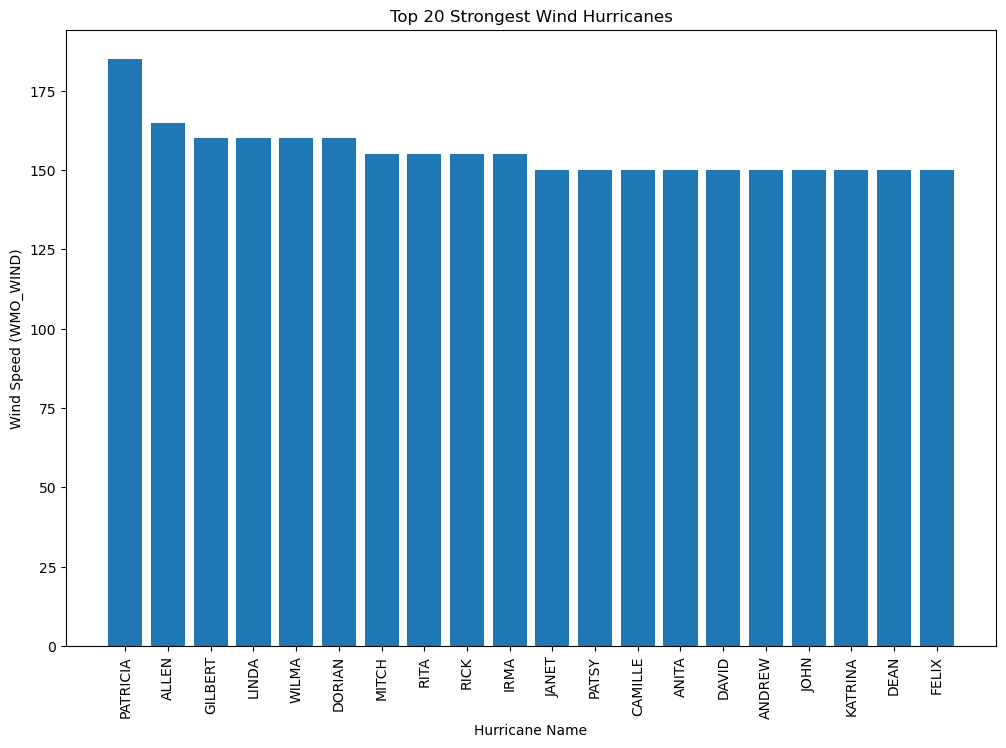

In [96]:
import matplotlib.pyplot as plt
#3.2
# 获取风速最高的前 20 个飓风
top_20_hurricanes = max_wind_df.nlargest(20, 'WMO_WIND')

# 绘制柱状图
plt.figure(figsize=(12, 8))
plt.bar(top_20_hurricanes['NAME'], top_20_hurricanes['WMO_WIND'])
plt.xticks(rotation=90)
plt.xlabel("Hurricane Name")
plt.ylabel("Wind Speed (WMO_WIND)")
plt.title("Top 20 Strongest Wind Hurricanes")
plt.show()



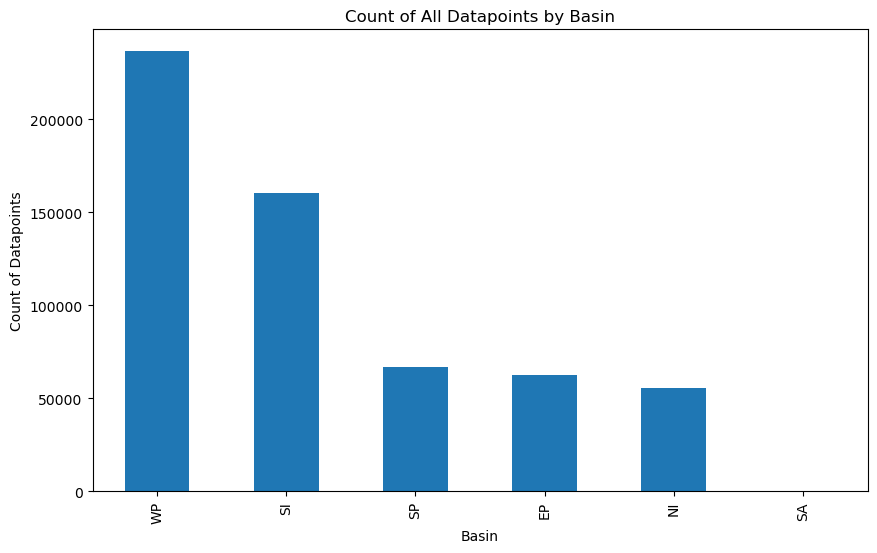

In [100]:
#3.3
# 按海盆（BASIN）统计数据点数量
basin_counts = df['BASIN'].value_counts()


plt.figure(figsize=(10, 6))
basin_counts.plot(kind='bar')
plt.xlabel("Basin")
plt.ylabel("Count of Datapoints")
plt.title("Count of All Datapoints by Basin")
plt.show()




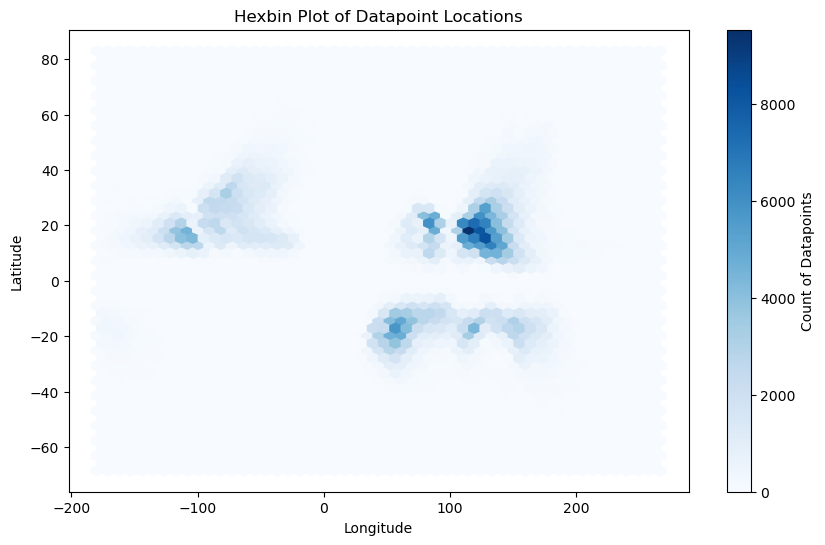

In [102]:
# 问题 3.4: 制作数据点在经纬度上的六边形图
# 检查数据中是否包含 LAT 和 LON 列
# 绘制六边形图
plt.figure(figsize=(10, 6))
plt.hexbin(df['LON'], df['LAT'], gridsize=50, cmap='Blues')
plt.colorbar(label='Count of Datapoints')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Hexbin Plot of Datapoint Locations")
plt.show()



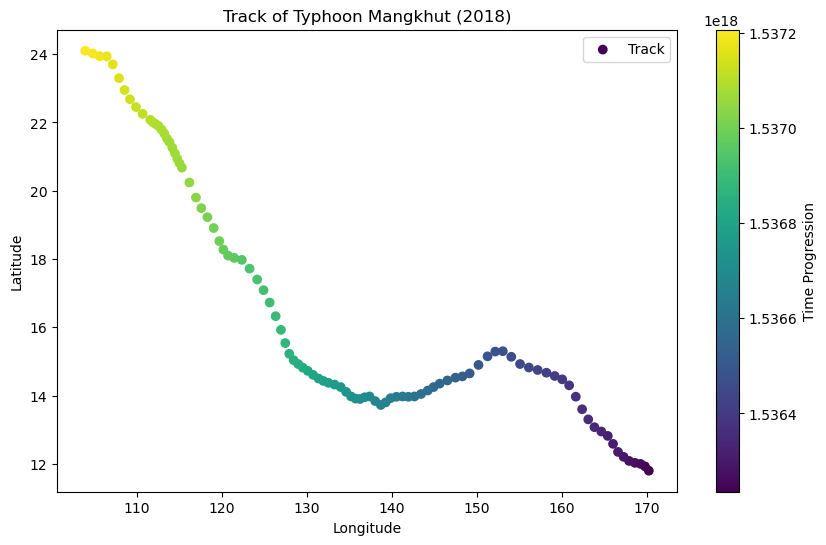

In [106]:
# 问题 3.5: 找到台风“山竹”（2018年）并绘制其路径的散点图
# 将 ISO_TIME 列转换为年份以便筛选
df['YEAR'] = df['ISO_TIME'].dt.year

# 筛选出 2018 年的台风山竹（Mangkhut）
mangkhut_df = df[(df['NAME'] == 'MANGKHUT') & (df['YEAR'] == 2018)]



plt.figure(figsize=(10, 6))
plt.scatter(mangkhut_df['LON'], mangkhut_df['LAT'], c=mangkhut_df['ISO_TIME'], cmap='viridis', label='Track')
plt.colorbar(label='Time Progression')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Track of Typhoon Mangkhut (2018)")
plt.legend()
plt.show()



In [110]:
# 问题 3.6: 创建过滤后的数据框，只包含1970年之后西北太平洋（WP）和东太平洋（EP）的数据
# 将 ISO_TIME 列转换为年份以便筛选
df['YEAR'] = df['ISO_TIME'].dt.year

# 过滤条件：1970年及之后，且海盆为 WP 或 EP
filtered_df = df[(df['YEAR'] >= 1970) & (df['BASIN'].isin(['WP', 'EP']))]

print("过滤后的数据框：")
filtered_df.head()




过滤后的数据框：


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG,YEAR
350393,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 00:00:00,TS,7.00000,151.400,NaN,1006,tokyo,main,1088,1088,_OO___________,1970
350394,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 03:00:00,TS,7.24752,151.205,NaN,,,main,1109,1109,_PP___________,1970
350395,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 06:00:00,TS,7.50000,151.000,NaN,1002,tokyo,main,1143,1143,_OO___________,1970
350396,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 09:00:00,TS,7.75747,150.772,NaN,,,main,1171,1168,_PP___________,1970
350397,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 12:00:00,TS,8.00000,150.500,NaN,998,tokyo,main,1182,1179,_OO___________,1970


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14708\1529267610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DATE'] = filtered_df['ISO_TIME'].dt.date


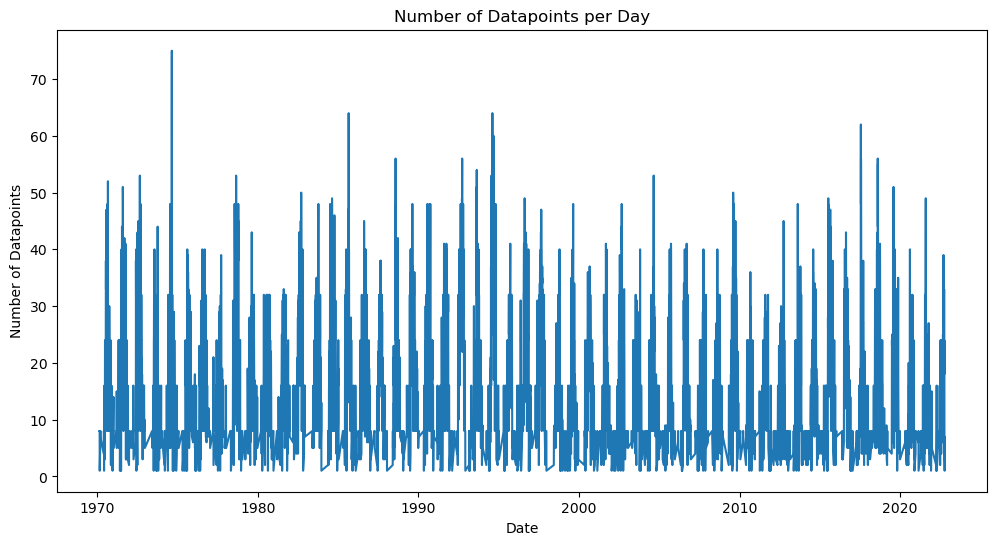

In [112]:
# 问题 3.7: 计算每天的数据点数量
# 确保使用过滤后的数据框
# 提取日期部分，并按日期计算数据点数量
filtered_df['DATE'] = filtered_df['ISO_TIME'].dt.date
daily_counts = filtered_df.groupby('DATE').size()

# 绘制每天的数据点数量
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.xlabel("Date")
plt.ylabel("Number of Datapoints")
plt.title("Number of Datapoints per Day")
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14708\298783493.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DAY_OF_YEAR'] = filtered_df['ISO_TIME'].dt.dayofyear


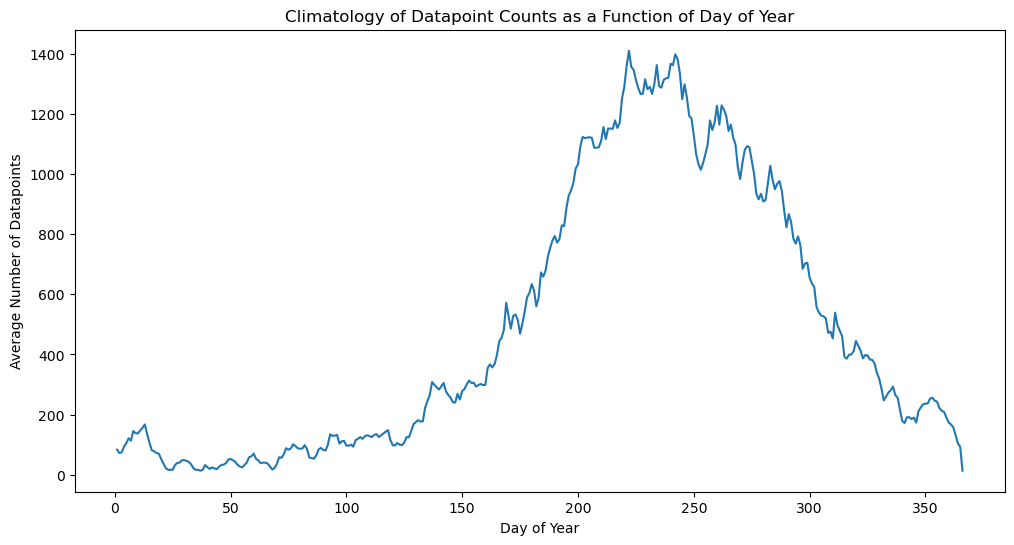

In [114]:
# 问题 3.8: 计算一年中每一天的平均数据点数量作为气候学统计


filtered_df['DAY_OF_YEAR'] = filtered_df['ISO_TIME'].dt.dayofyear

# 按一年中的天数分组，计算每天的数据点数量的平均值
day_of_year_counts = filtered_df.groupby('DAY_OF_YEAR').size()
climatology_counts = day_of_year_counts.groupby(level=0).mean()

plt.figure(figsize=(12, 6))
climatology_counts.plot()
plt.xlabel("Day of Year")
plt.ylabel("Average Number of Datapoints")
plt.title("Climatology of Datapoint Counts as a Function of Day of Year")
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14708\3273855713.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DAY_OF_YEAR'] = filtered_df['ISO_TIME'].dt.dayofyear
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14708\3273855713.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DATE'] = filtered_df['ISO_TIME'].dt.date


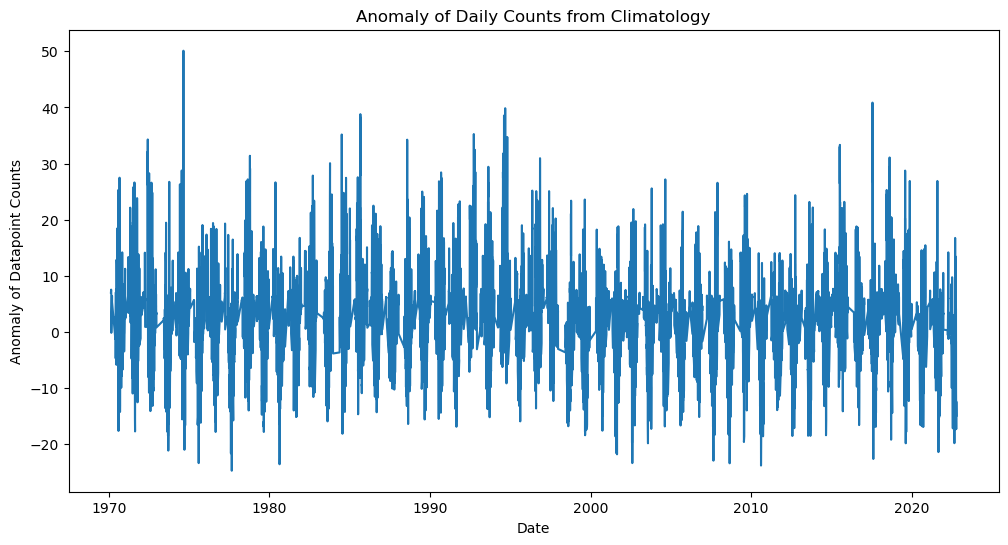

In [120]:


# 问题 3.9: 计算每天的数据点数量与气候学统计之间的差异

import matplotlib.pyplot as plt

# 提取一天中的天数（1 到 365/366）
filtered_df['DAY_OF_YEAR'] = filtered_df['ISO_TIME'].dt.dayofyear

# 计算每天的数据点数量
filtered_df['DATE'] = filtered_df['ISO_TIME'].dt.date
daily_counts = filtered_df.groupby('DATE').size()

# 计算气候学均值，即每年中每一天的平均数据点数量
climatology_counts = filtered_df.groupby('DAY_OF_YEAR').size() / filtered_df['YEAR'].nunique()

# 将 daily_counts 的索引转换为一年中的天数
daily_counts_dayofyear = daily_counts.index.to_series().apply(lambda x: x.timetuple().tm_yday)

# 计算异常值
anomaly = daily_counts.values - daily_counts_dayofyear.map(climatology_counts).values

# 绘制结果
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, anomaly)
plt.xlabel("Date")
plt.ylabel("Anomaly of Datapoint Counts")
plt.title("Anomaly of Daily Counts from Climatology")
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14708\1660031317.py:13: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_anomaly = anomaly_df.resample('A').mean()


<Figure size 1200x600 with 0 Axes>

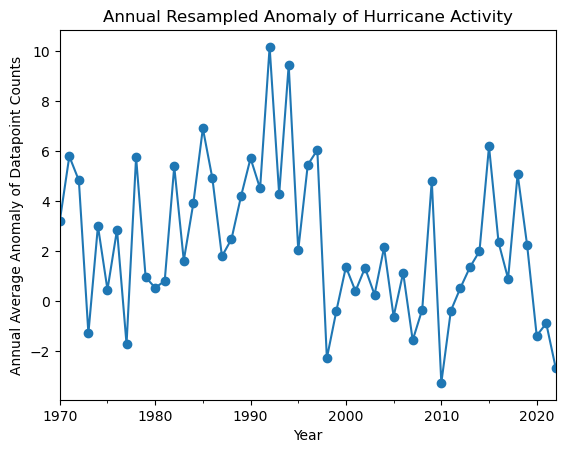

In [124]:
# 问题 3.10: 以年分辨率对异常时间序列进行重采样并绘制图表
import pandas as pd
import matplotlib.pyplot as plt

# 创建一个 DataFrame 以便于重采样
anomaly_df = pd.DataFrame({'DATE': daily_counts.index, 'ANOMALY': anomaly})

# 确保 'DATE' 列为日期格式并设置为索引
anomaly_df['DATE'] = pd.to_datetime(anomaly_df['DATE'])
anomaly_df.set_index('DATE', inplace=True)

# 将异常值时间序列重新采样为年分辨率（年平均值），并使用 'A' 作为年末重采样
annual_anomaly = anomaly_df.resample('A').mean()


plt.figure(figsize=(12, 6))
annual_anomaly.plot(marker='o', legend=False)
plt.xlabel("Year")
plt.ylabel("Annual Average Anomaly of Datapoint Counts")
plt.title("Annual Resampled Anomaly of Hurricane Activity")
plt.show()





In [56]:

import pandas as pd
import matplotlib.pyplot as plt

# 加载数据集
file_path = 'USW00013722.csv'
df = pd.read_csv(file_path)

# 对 DATE 列进行处理，只保留年并将其转换为完整的年份（1944-2024）
df['DATE'] = df['DATE'].apply(lambda x: f"19{x[-2:]}" if int(x[-2:]) >= 44 else f"20{x[-2:]}")
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y')

# 问题 4.1: 清理 TAVG 列的缺失值或数据质量较差的数据点
# 去除 TAVG 列中缺失或异常值（通常标记为特定数值，例如 -9999）
df['TAVG'] = pd.to_numeric(df['TAVG'], errors='coerce')
df_cleaned = df.dropna(subset=['TAVG'])



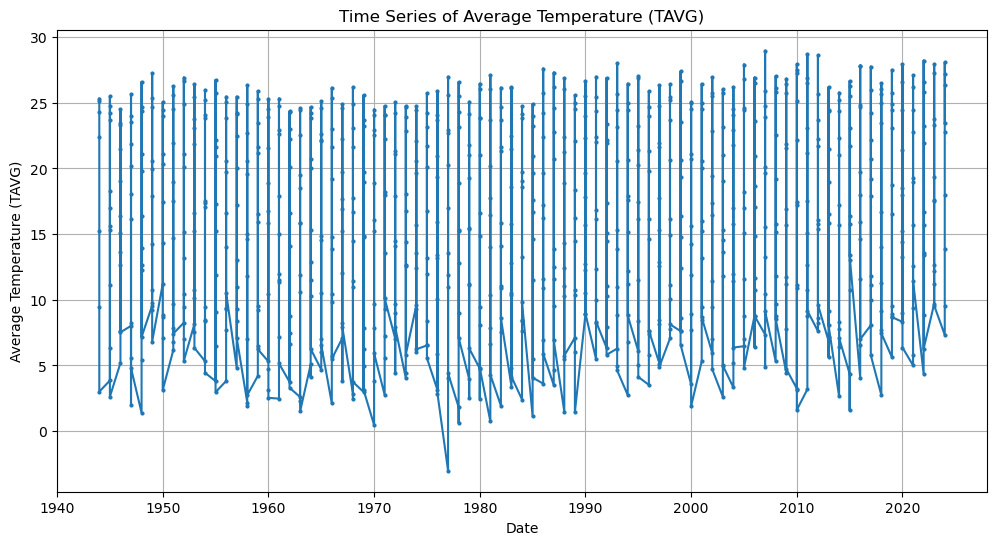

In [58]:


# 问题 4.2: 绘制 TAVG 的时间序列图
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['DATE'], df_cleaned['TAVG'], linestyle='-', marker='o', markersize=2)
plt.xlabel('Date')
plt.ylabel('Average Temperature (TAVG)')
plt.title('Time Series of Average Temperature (TAVG)')
plt.grid(True)
plt.show()



In [60]:
# 问题 4.3: 对 TAVG 进行 5 项简单统计检查
mean_tavg = df_cleaned['TAVG'].mean()  # 计算平均值
median_tavg = df_cleaned['TAVG'].median()  # 计算中位数
std_tavg = df_cleaned['TAVG'].std()  # 计算标准差
min_tavg = df_cleaned['TAVG'].min()  # 计算最小值
max_tavg = df_cleaned['TAVG'].max()  # 计算最大值

print("TAVG 列的统计检查结果：")
print(f"平均值: {mean_tavg}")
print(f"中位数: {median_tavg}")
print(f"标准差: {std_tavg}")
print(f"最小值: {min_tavg}")
print(f"最大值: {max_tavg}")


TAVG 列的统计检查结果：
平均值: 15.63441908713693
中位数: 15.774999999999999
标准差: 7.74241454222144
最小值: -3.02
最大值: 28.96
